In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import spotipy 
import librosa
import librosa.display
import numpy as np
import matplotlib as mpl
import urllib.request
import seaborn as sns
import tqdm
import scipy
import joblib
from pathlib import Path
from IPython.display import Audio, Markdown, Image
from spotipy.oauth2 import SpotifyClientCredentials 


# Números y Datos
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d

# Análisis de sonido
import librosa
import librosa.display
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix

#sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [5]:
df_int = pd.read_pickle('../sources/dataset_integrado.pickle')
genre_real = df_int['genre']
df_int = df_int.drop([
    'disc_number',
    'duration_ms',
    'popularity',
    'track_number',
],1)

ValueError: unsupported pickle protocol: 5

In [31]:
from pyclustering.cluster.clarans import clarans;
from pyclustering.utils import timedcall;
from sklearn import datasets


In [46]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_int.select_dtypes(include=numerics)

#newdf = newdf.iloc[:,0:12]

newdf.head(3).T.head(20)

id,4d3XHYFFuYYzxWr2cJ6yQl,3X3p3u03P8eFL8WTH0oaaU,4KlXeaheot0OI9PoOWspvZ
danceability,0.48700,0.615000,0.79200
energy,0.14500,0.204000,0.30100
key,5.00000,7.000000,9.00000
loudness,-18.67000,-16.075000,-9.92500
mode,1.00000,1.000000,0.00000
speechiness,0.05220,0.043900,0.04090
acousticness,0.87600,0.872000,0.54600
instrumentalness,0.82200,0.382000,0.82100
liveness,0.14900,0.071000,0.07700
valence,0.14200,0.496000,0.42400


In [52]:
from sklearn.preprocessing import quantile_transform

data = pd.DataFrame(
    quantile_transform(
        newdf, 
        output_distribution = 'normal', 
        random_state = 0, 
        copy = True
    ),
    columns=newdf.columns,
    index=newdf.index
)
data.head(3).T.head(15)

id,4d3XHYFFuYYzxWr2cJ6yQl,3X3p3u03P8eFL8WTH0oaaU,4KlXeaheot0OI9PoOWspvZ
danceability,0.165095,0.875354,1.968872
energy,-0.930036,-0.711981,-0.466803
key,-0.045180,0.360172,0.892038
loudness,-0.919089,-0.676789,-0.046436
mode,5.199338,5.199338,-5.199338
speechiness,0.252311,-0.177827,-0.396560
acousticness,0.590949,0.579039,0.208091
instrumentalness,0.639462,0.124523,0.636387
liveness,0.271787,-1.286702,-1.121381
valence,-0.492137,0.597790,0.441748


In [57]:
# Escalando cada feature por su importancia para la clasificacion

dfeature = pd.read_pickle("../sources/importance.pickle")
dfeature
for k,row in dfeature.iterrows():
#    print(row['feature'])
    data[row['feature']] = data[row['feature']]*100*row['importance']
    
data.head(3).T.head(15)

id,4d3XHYFFuYYzxWr2cJ6yQl,3X3p3u03P8eFL8WTH0oaaU,4KlXeaheot0OI9PoOWspvZ
danceability,0.449857,2.385191,5.364841
energy,-2.822064,-2.160406,-1.416449
key,-0.000240,0.001914,0.004740
loudness,-2.557790,-1.883478,-0.129229
mode,0.013373,0.013373,-0.013373
speechiness,0.070425,-0.049635,-0.110688
acousticness,8.640044,8.465918,3.042414
instrumentalness,7.713100,1.501983,7.676006
liveness,0.017046,-0.080699,-0.070330
valence,-1.981205,2.406535,1.778354


In [58]:
def plot_conf_matrix(real, Z2,description):
    mat = confusion_matrix(real, Z2)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=genres,
                yticklabels=range(9))
    plt.xlabel('Real')
    plt.ylabel(description);
    plt.show()

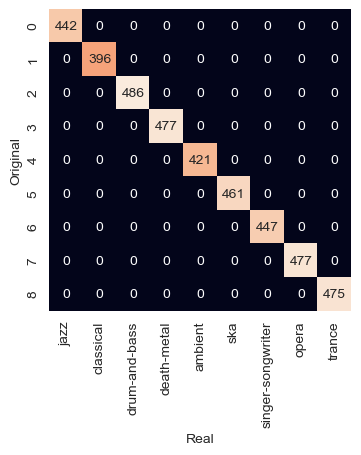

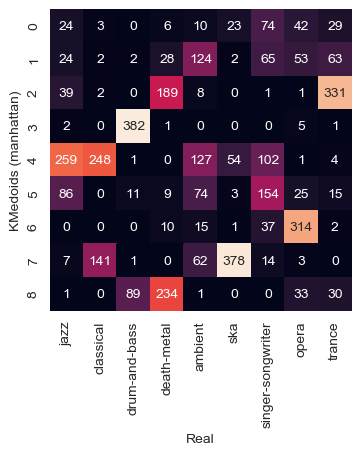

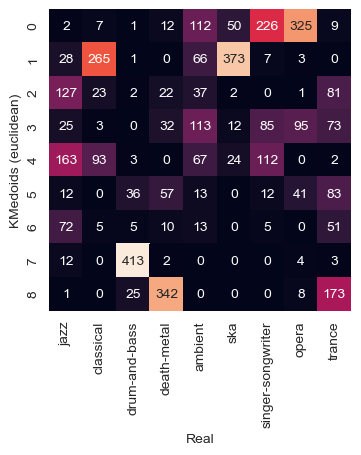

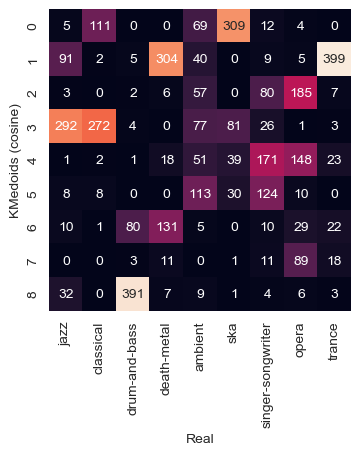

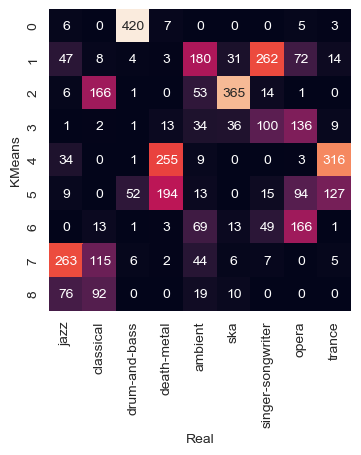

In [59]:
n=9
np.random.seed(3569)

genres = genre_real.unique()

plot_conf_matrix(genre_real.values, genre_real.values,'Original')

selected_models = [
    (
        KMedoids(metric="manhattan", n_clusters=n),
        "KMedoids (manhattan)",
    ),
    (
        KMedoids(metric="euclidean", n_clusters=n),
        "KMedoids (euclidean)",
    ),
    (KMedoids(metric="cosine", n_clusters=n), "KMedoids (cosine)"),
    (KMeans(n_clusters=n), "KMeans"),
]

for i, (model, description) in enumerate(selected_models):
    model.fit(data)
    Z = model.predict(data)
    Z2 = [genres[x] for x in Z]
    #print(description)
    #print(confusion_matrix(genre_real.values, Z2))
    plot_conf_matrix(genre_real.values, Z2,description)